In [4]:
#Convert image'type:
from skimage.util import

img_as_float: Convert to 64-bit floating point
img_as_ubyte: Convert to 8-bit uint
img_as_uint: Convert to 16-bit uint
img_as_int: Convert to 16-bit int
    
import cv2
#read image
img = cv.imread('GB_2218_O.tif', cv.IMREAD_GRAYSCALE)
img = cv.imread('GB_2218_O.tif', cv.IMREAD_COLOR)
img = cv.imread('GB_2218_O.tif', cv.IMREAD_UNCHANGED)
#convert
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

-1

In [ ]:
#crop image
import cv2
image = cv2.imread('GB_2218_O.tif', cv2.IMREAD_GRAYSCALE)
crop_img = image[100:200, 100:200]
cv2.namedWindow('Cropped Image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Cropped Image', 600, 600)
cv2.imshow("Cropped Image", crop_img)
key = cv2.waitKey(0)
cv2.destroyAllWindows()

#duplicate image
import cv2
image = cv2.imread('GB_2218_O.tif', cv2.IMREAD_GRAYSCALE)
img_2 = image.copy()
cv2.namedWindow('Duplicate Image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Duplicate Image', 600, 600)
cv2.imshow("Duplicate Image", img_2)
key = cv2.waitKey(0)
cv2.destroyAllWindows()

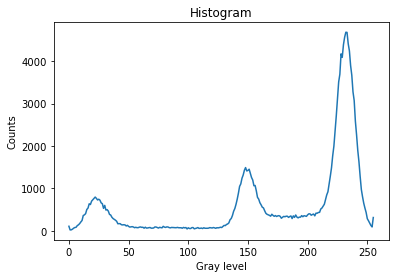

In [14]:
#Plot image's histogram
import cv2
import numpy as np

def Histogram(image):
    if image.dtype == 'uint8':
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(np.arange(0, 256, 1), np.array(hist).squeeze())
    elif image == 'uint16':
        hist = cv2.calcHist([image], [0], None, [256], [0, 65536])
        plt.plot(np.arange(0, 65536, 256), np.array(hist).squeeze())
    plt.title('Histogram')
    plt.xlabel('Gray level'), plt.ylabel('Counts')
    plt.show()
    
image = cv2.imread('GB_2218_O.tif', cv2.IMREAD_GRAYSCALE)
Histogram(image)

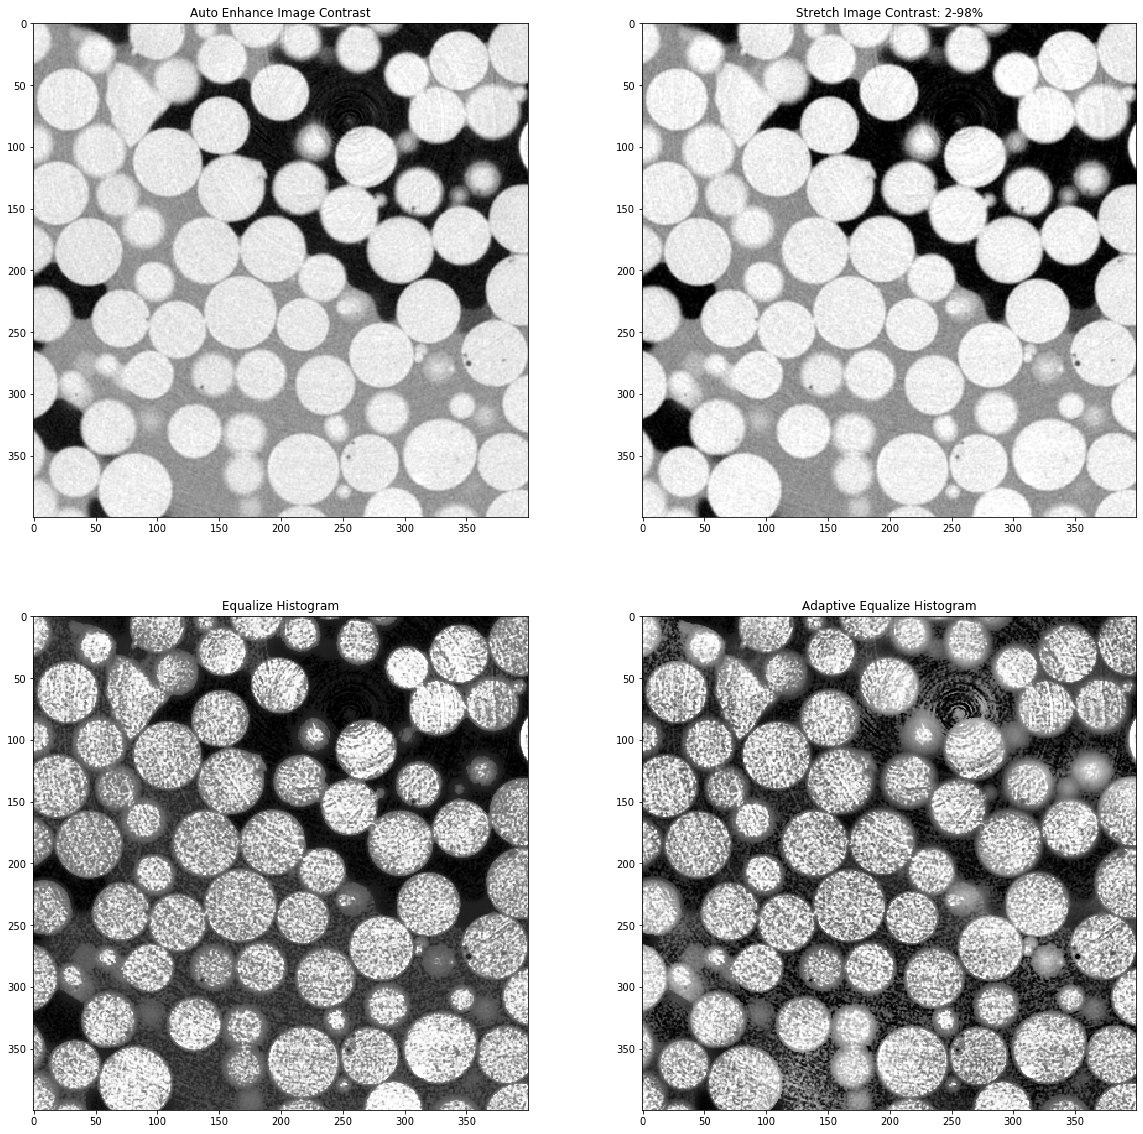

In [11]:
#Enhance Image Contrast
import cv2
import cv2 as cv
import numpy as np
from skimage import exposure
from matplotlib import pyplot as plt

def EnhImgContrAuto(image):
    if image.dtype == 'uint8':
        hist = cv.calcHist([image], [0], None, [256], [0, 256])
        GV = np.arange(0, 256, 1)
    elif image.dtype == 'uint16':
        hist = cv.calcHist([image], [0], None, [256], [0, 65536])
        GV = np.arange(0, 65536, 256)
    vr = np.nonzero(np.array(hist).squeeze())
    pvmin = np.amin(vr)
    pvmax = np.amax(vr)
    vmin=GV[pvmin]
    vmax=GV[pvmax]
    return vmin, vmax

def EnhImgContrStretch(image):
    p2, p98 = np.percentile(image, (2, 98))
    img = exposure.rescale_intensity(image, in_range=(p2, p98))
    return img

def EnhImgContrEquHis(image):
    img = exposure.equalize_hist(image)
    return img

def EnhImgContrAdapEquHis(image):
    img = exposure.equalize_adapthist(image, clip_limit=0.03) #cv.equalizeHist(self.img) only for 8bit image
    return img
    
image = cv.imread('GB_2218_O.tif', cv.IMREAD_GRAYSCALE)
vmin, vmax = EnhImgContrAuto(image)
img1 = EnhImgContrStretch(image)
img2 = EnhImgContrEquHis(image)
img3 = EnhImgContrAdapEquHis(image)

fig, axs = plt.subplots(2, 2, figsize=(20,20))
axs[0, 0].imshow(image, vmin=vmin, vmax=vmax, cmap='gray')
axs[0, 0].set_title('Auto Enhance Image Contrast')
axs[0, 1].imshow(img1, cmap='gray')
axs[0, 1].set_title('Stretch Image Contrast: 2-98%')
axs[1, 0].imshow(img2, cmap='gray')
axs[1, 0].set_title('Equalize Histogram')
axs[1, 1].imshow(img3, cmap='gray')
axs[1, 1].set_title('Adaptive Equalize Histogram')
plt.show()

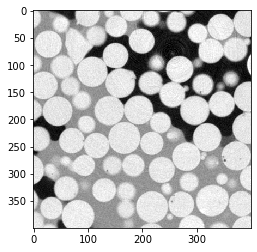

In [13]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def NormImg(image):
    if image.dtype == 'uint8':
        img = cv.normalize(image, dst=None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
        return img
    elif image.dtype == 'uint16':
        img = cv.normalize(image, dst=None, alpha=0, beta=65535, norm_type=cv.NORM_MINMAX)
        return img

image = cv.imread('GB_2218_O.tif', cv.IMREAD_GRAYSCALE)
img = NormImg(image)
plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
#Modify brightness & contrast of image 8bit
import cv2

def funcBrightContrast(bright=0):
    bright = cv2.getTrackbarPos('bright', 'Original Image')
    contrast = cv2.getTrackbarPos('contrast', 'Original Image')
    effect = apply_brightness_contrast(img,bright,contrast)
    cv2.imshow('Effect', effect)
    
def apply_brightness_contrast(input_img, brightness = 255, contrast = 127):
    brightness = map(brightness, 0, 510, -255, 255)
    contrast = map(contrast, 0, 254, -127, 127)
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    if contrast != 0:
        f = float(131 * (contrast + 127)) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)
    cv2.putText(buf,'B:{},C:{}'.format(brightness,contrast),(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    return buf

def map(x, in_min, in_max, out_min, out_max):
    return int((x-in_min) * (out_max-out_min) / (in_max-in_min) + out_min)

original = cv2.imread('GB_2218_O.tif', cv2.IMREAD_COLOR)
img = original.copy()
cv2.namedWindow('Original Image',1)

bright = 255
contrast = 127
#Brightness value range -255 to 255
#Contrast value range -127 to 127
cv2.createTrackbar('bright', 'Original Image', bright, 2*255, funcBrightContrast)
cv2.createTrackbar('contrast', 'Original Image', contrast, 2*127, funcBrightContrast)
funcBrightContrast(0)

cv2.imshow('Original Image', original)
cv2.waitKey(0)

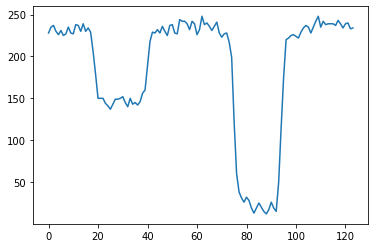

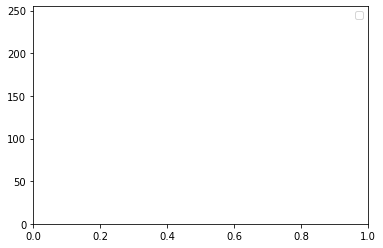

In [15]:
#profile line
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import draw

# Actual mouse callback function
def print_coords(event, x, y, flags, param):

    # Global variables needed
    global image, image_copy, r_start, c_start

    # If left mouse button is clicked, start of line
    if (event == cv2.EVENT_LBUTTONDOWN):
        r_start = x
        c_start = y

    # If left mouse button is clicked, end of line; plot intensity profile
    if (event == cv2.EVENT_LBUTTONUP):
        r_end = x
        c_end = y
        image = cv2.line(image_copy.copy(), (r_start, c_start), (r_end, c_end), (0, 255, 255), 2)
        line = np.transpose(np.array(draw.line(r_start, c_start, r_end, c_end)))
        data = image_copy.copy()[line[:, 1], line[:, 0]]
        plt.close()
        plt.figure('Intensity profile')
        plt.plot(np.arange(0, len(line[:,0])), data)
        plt.draw()
        plt.pause(0.001)
        plt.legend(['Gray Value'])
        plt.ylim((0, 255))

# Read an image
image = cv2.imread('GB_2218_O.tif', cv2.IMREAD_GRAYSCALE)
image_copy = image.copy()

# Set up window and mouse callback function
cv2.namedWindow("image")
cv2.setMouseCallback("image", print_coords)

# Loop until the 'c' key is pressed
while True:

    # Display image; wait for keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # If 'c' key is pressed, break from loop
    if  key == ord("c"):
        break

cv2.destroyAllWindows()

(400, 400) (400, 400)


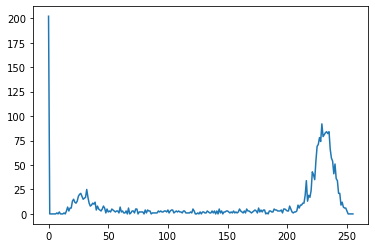

(400, 400) (400, 400)


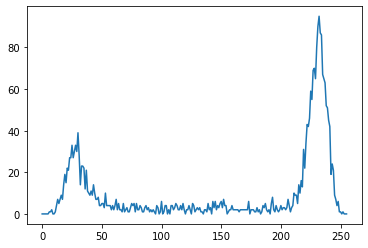

In [2]:
#histogram of rectangle zone (50x50, 8bit image)
import cv2
import numpy as np
from skimage import draw
from matplotlib import pyplot as plt

# mouse callback function
def draw_rectangle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.rectangle(image,(x,y),(x+50, y+50),(0,255,255),3)
        rr, cc = draw.rectangle((x,y),(x+50, y+50))
        mask = np.zeros(image.shape[:2], np.uint8)
        mask[rr, cc] = 255
        print(image.shape, mask.shape)
        hist = cv2.calcHist([image],[0],mask,[256],[0,256])
        plt.close()
        plt.plot(np.arange(256), hist)
        plt.show()

# Read an image
image = cv2.imread('GB_2218_O.tif', cv2.IMREAD_GRAYSCALE)

# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_rectangle)

while True:

    # Display image; wait for keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # If 'c' key is pressed, break from loop
    if  key == ord("c"):
        break

cv2.destroyAllWindows()

(400, 400) (400, 400)


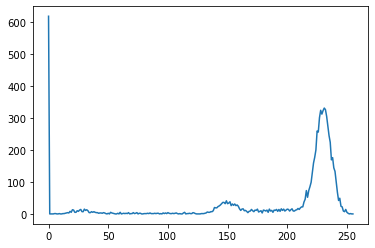

In [3]:
#histogram of circle zone
import cv2
import numpy as np
from skimage import draw
from matplotlib import pyplot as plt

# mouse callback function
def draw_rectangle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(image,(x,y),50,(0,255,255),3)
        rr, cc = draw.circle(x, y, 50)
        mask = np.zeros(image.shape[:2], np.uint8)
        mask[rr, cc] = 255
        print(image.shape, mask.shape)
        hist = cv2.calcHist([image],[0],mask,[256],[0,256])
        plt.close()
        plt.plot(np.arange(256), hist)
        plt.show()

# Read an image
image = cv2.imread('GB_2218_O.tif', cv2.IMREAD_GRAYSCALE)

# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_rectangle)

while True:

    # Display image; wait for keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # If 'c' key is pressed, break from loop
    if  key == ord("c"):
        break

cv2.destroyAllWindows()

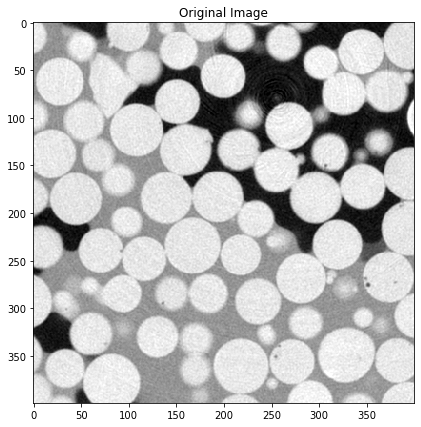

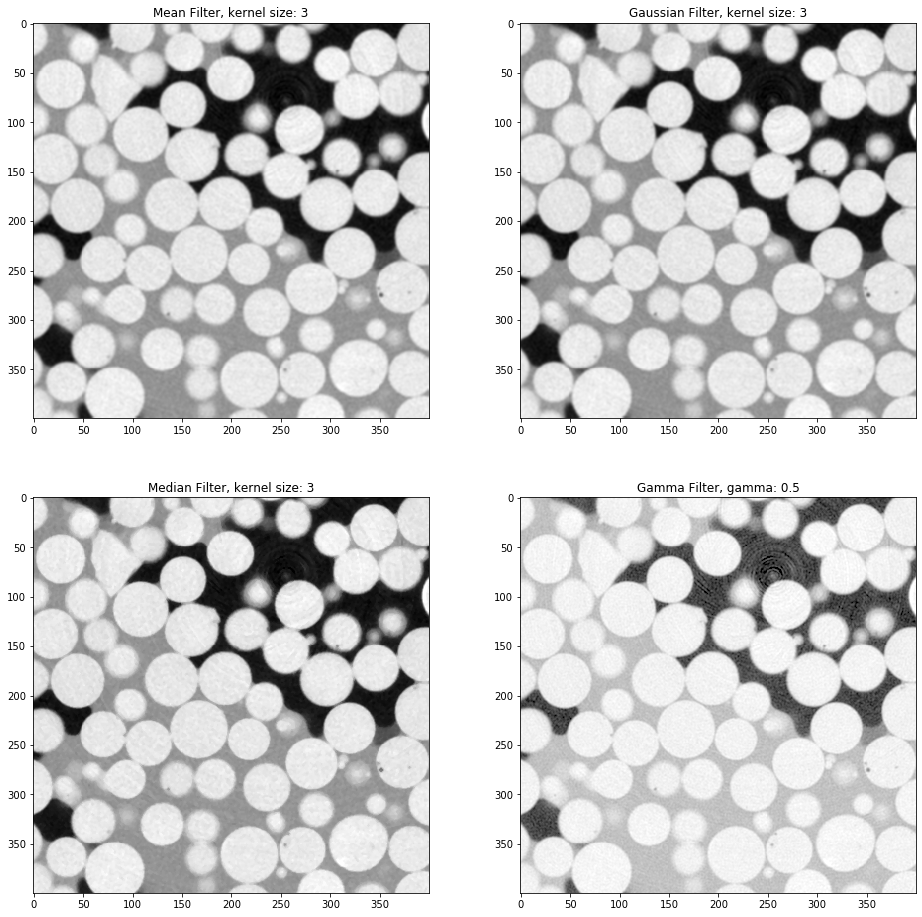

In [26]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import exposure

def BlurFilter(image, k):
    img = cv.blur(image, (k, k), cv.BORDER_CONSTANT)
    return img

def GaussFilter(image, k):
    img = cv.GaussianBlur(image, (k, k), cv.BORDER_DEFAULT)
    return img

def MedianFilter(image,k):
    img = cv.medianBlur(image, k)
    return img

def GammaFilter(image, gamma):
    img = exposure.adjust_gamma(image, gamma=gamma)
    return img

# Read an image
img = cv.imread('GB_2218_O.tif', cv.IMREAD_GRAYSCALE)
img1 = BlurFilter(image, 3)
img2 = GaussFilter(image, 3)
img3 = MedianFilter(image, 3)
img4 = GammaFilter(image, 0.5)

plt.figure(figsize=(7,7))
plt.imshow(img, cmap='gray')
plt.title('Original Image')

fig, axs = plt.subplots(2, 2, figsize=(16,16))
axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Mean Filter, kernel size: 3')
axs[0, 1].imshow(img2, cmap='gray')
axs[0, 1].set_title('Gaussian Filter, kernel size: 3')
axs[1, 0].imshow(img3, cmap='gray')
axs[1, 0].set_title('Median Filter, kernel size: 3')
axs[1, 1].imshow(img4, cmap='gray')
axs[1, 1].set_title('Gamma Filter, gamma: 0.5')
plt.show()

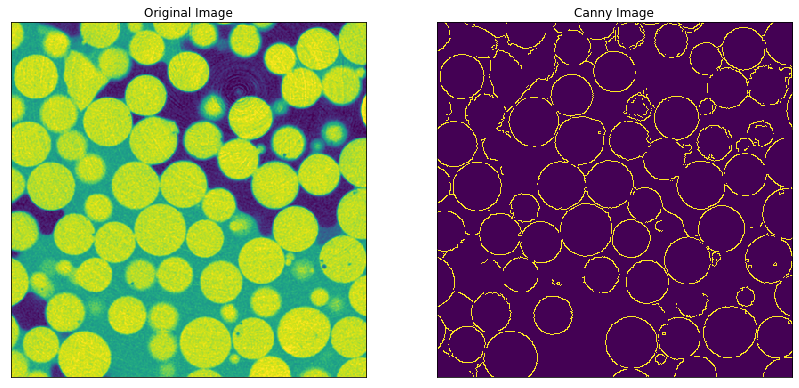

In [60]:
#Edge detection
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('GB_2218_O.tif', cv.IMREAD_GRAYSCALE)
img = cv.medianBlur(image, 1)
resized_img = cv.resize(img, (400, 400))

#Edge detection
canny_img = cv.Canny(resized_img, 150, 255)#thresholds

plt.figure(figsize=(14,7))
plt.subplot(121), plt.imshow(resized_img), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(canny_img), plt.title('Canny Image')
plt.xticks([]), plt.yticks([])
plt.show()

Number of detected contours 24


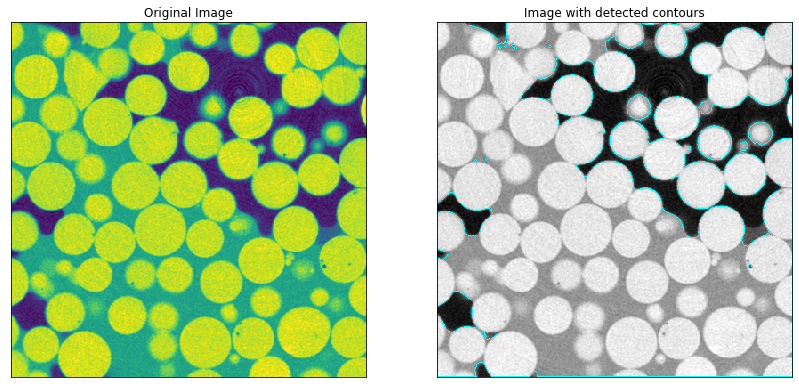

In [112]:
#Contour detection
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('GB_2218_O.tif', cv.IMREAD_GRAYSCALE)
img = cv.medianBlur(image, 1)
resized_img = cv.resize(img, (400, 400))

ret, thres = cv.threshold(resized_img, 190, 255, cv.THRESH_OTSU + cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(thres, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

color_img = cv.cvtColor(resized_img, cv.COLOR_GRAY2RGB)
img = cv.drawContours(color_img, contours, -1, (0,255,255), 1)
print('Number of detected contours ' + str(len(contours)))

plt.figure(figsize=(14,7))
plt.subplot(121), plt.imshow(resized_img), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(color_img), plt.title('Image with detected contours')
plt.xticks([]), plt.yticks([])
plt.show()

In [100]:
#Hough circles
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

gray_img = cv.imread('GB_2218_O.tif', cv.IMREAD_GRAYSCALE)
rgb_img = cv.cvtColor(gray_img, cv.COLOR_BGR2RGB)
gray_blurred = cv.medianBlur(gray_img, 3)

detected_circles = cv.HoughCircles(gray_blurred, cv.HOUGH_GRADIENT, dp=2., minDist=5, param1=100, param2=90, minRadius=0, maxRadius=50)

if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))
    for i in detected_circles[0,:]:
        a, b, r = i[0], i[1], i[2]
        cv.circle(rgb_img, (a,b), r, (0,255,0), 2)
        cv.circle(rgb_img, (a,b), 1, (0,0,0), 3)
    cv.imshow('Image with detected circles', rgb_img)
    cv.waitKey()
    cv.destroyAllWindows()

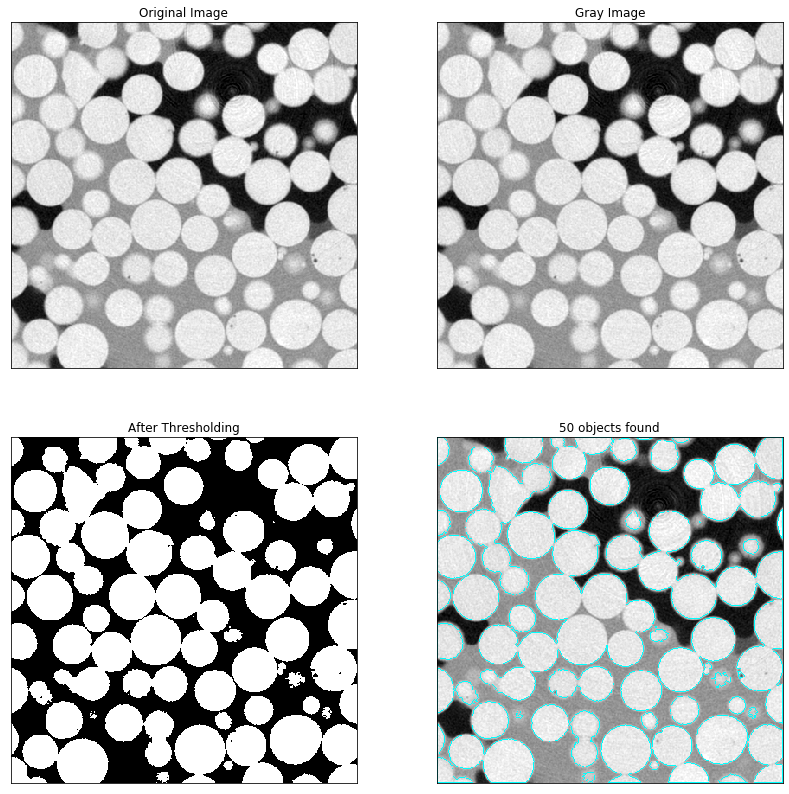

In [111]:
#Detect objects
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import imutils

img = cv.imread('GB_2218_O.tif', cv.IMREAD_COLOR)
resized_img = cv.resize(img, (400, 400))
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#Counting objects
ret, thres = cv.threshold(gray_img, 190, 255, cv.THRESH_BINARY)
cnts = cv.findContours(thres.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
output = resized_img.copy()

cv.drawContours(output, cnts, -1, (0,255,255), 1)
text = "{} objects found".format(len(cnts))

plt.figure(figsize=(14,14))
plt.subplot(221), plt.imshow(rgb_img), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(gray_img, cmap='gray'), plt.title('Gray Image')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(thres, cmap='gray'), plt.title('After Thresholding')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(output), plt.title(text)
plt.xticks([]), plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Segmented Image: Otsu method')

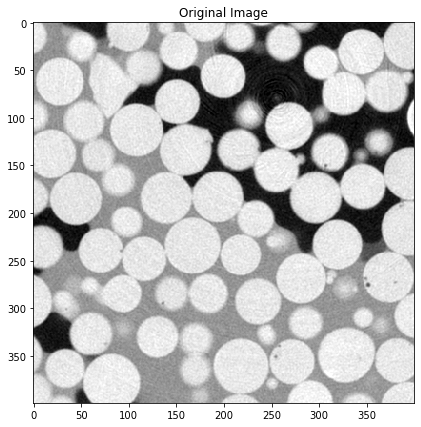

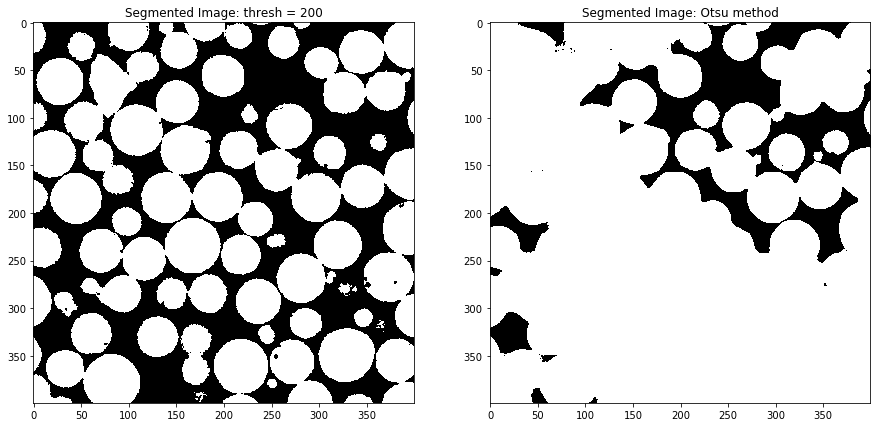

In [29]:
#Segmentations
import cv2 as cv
from matplotlib import pyplot as plt

def B_Threshold(image, thresh):
    if image.dtype == 'uint8':
        ret, img = cv.threshold(image, thresh, 255, cv.THRESH_BINARY)
        return img
    elif image.dtype == 'uint16':
        ret, img = cv.threshold(image, thresh, 65535, cv.THRESH_BINARY)
        return img
    
def OtB_Threshold(image):
    if image.dtype == 'uint8':
        ret, img = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
        return img
    elif image.dtype == 'uint16':
        ret, img = cv.threshold(image, 0, 65535, cv.THRESH_BINARY + cv.THRESH_OTSU)
        return img
        
# Read an image
img = cv.imread('GB_2218_O.tif', cv.IMREAD_GRAYSCALE)
img = cv.medianBlur(image, 1)

img1 = B_Threshold(img, 200)
img2 = OtB_Threshold(img)

plt.figure(figsize=(7,7))
plt.imshow(img, cmap='gray')
plt.title('Original Image')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))
ax1.imshow(img1, cmap='gray')
ax1.set_title('Segmented Image: thresh = 200')
ax2.imshow(img2, cmap='gray')
ax2.set_title('Segmented Image: Otsu method')

Text(0.5, 1.0, 'Result')

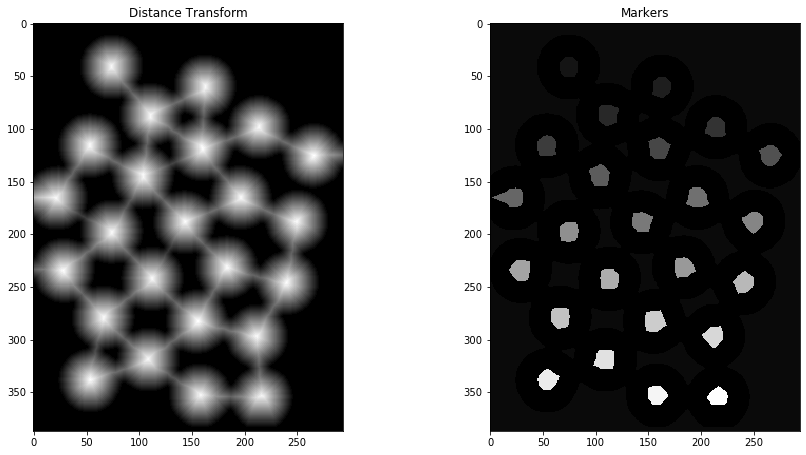

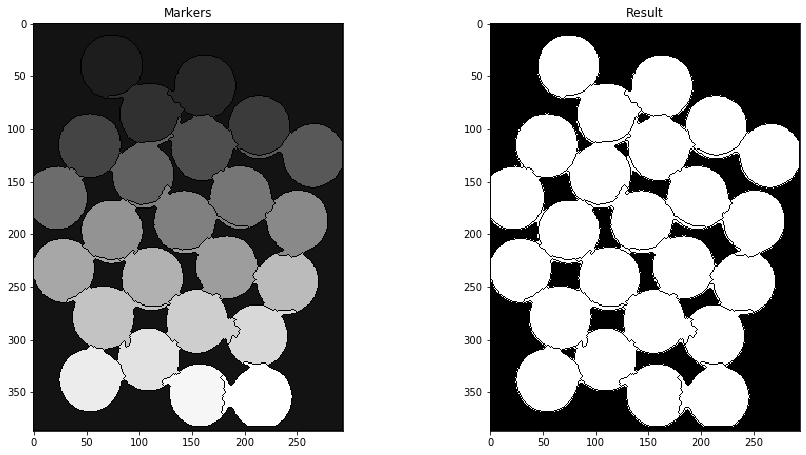

In [49]:
#watershed segmentation
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('Objects.jpg')
img = cv.medianBlur(img, 3)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# noise removal
kernel = np.ones((1,1),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel,iterations = 3)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,3)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))
ax1.imshow(dist_transform, cmap='gray')
ax1.set_title('Distance Transform')
ax2.imshow(markers, cmap='gray')
ax2.set_title('Markers')

markers = cv.watershed(img,markers)#The boundary region will be marked with -1
thresh[markers == -1] = 0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))
ax1.imshow(markers, cmap='gray')
ax1.set_title('Markers')
ax2.imshow(thresh, cmap='gray')
ax2.set_title('Result')

Text(0.5, 1.0, 'Segmented Image: Kmeans')

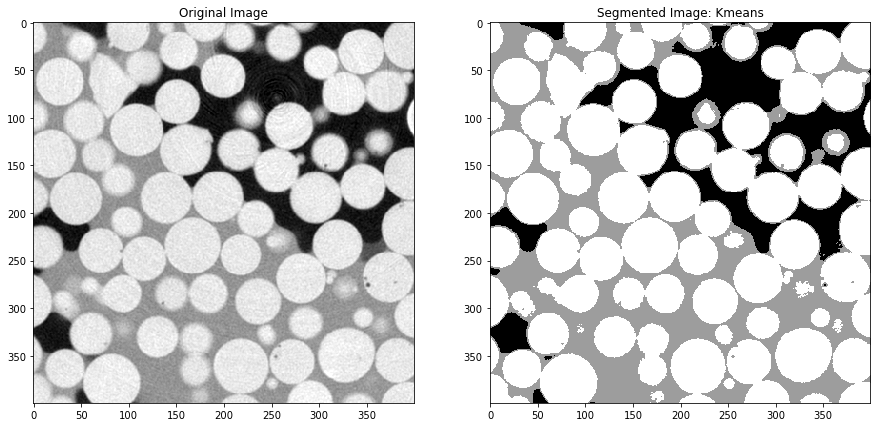

In [50]:
#Kmeans Segmentation
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def KmeansImg(image, k):
    if np.size(image.shape) == 3:
        z = image.reshape(-1, 3)
    else:
        z = image.reshape(-1)
    z = np.float32(z)

    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 1.0)

    ret, label, center = cv.kmeans(z, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    img = res.reshape(image.shape)
    return img

# Read an image
img = cv.imread('GB_2218_O.tif', cv.IMREAD_GRAYSCALE)

img1 = KmeansImg(img, 3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(img1, cmap='gray')
ax2.set_title('Segmented Image: Kmeans')